In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data=pd.read_csv('/content/flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
# unique ratings
pd.unique(data['rating'])


array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

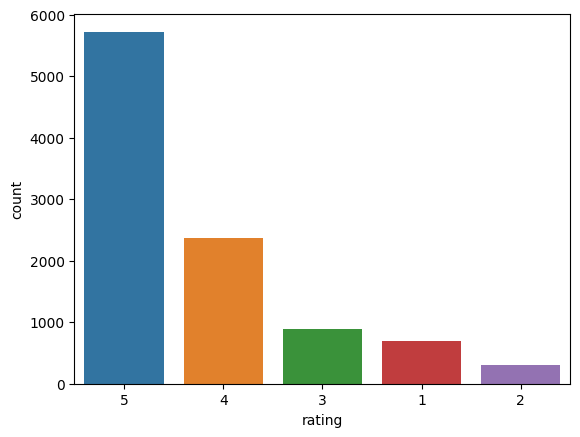

In [ ]:
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)

In [ ]:
pos_neg=[]
for i in range(len(data['rating'])):
  if data['rating'][i]>=5:
    pos_neg.append(1)
  else:
    pos_neg.append(0)
data['label']=pos_neg


In [ ]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [ ]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review



100%|██████████| 9976/9976 [00:21<00:00, 455.27it/s]


In [ ]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1
